# Electric Vehicle Charging Station Energy Consumption
Source: https://hub.arcgis.com/datasets/183adc24880b41c4be9fd6a14eb6165f_0/explore \
USA shapefile: https://hub.arcgis.com/datasets/esri::usa-states-generalized/explore?location=34.445427%2C-87.771263%2C3.63&showTable=true \
Colorado shapefile: https://hub.arcgis.com/datasets/CSUrams::colorado-counties/explore?location=38.997802%2C-105.550911%2C7.66

In [67]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Data Processing

#### Reading dataset

In [2]:
dataset = gpd.read_file("Data_Electric-Vehicle-Charging-Station-Energy-Consumption.csv")
dataset

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId,geometry
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,1,None
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,2,None
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,3,None
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,4,None
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.8,0.756,0.226,Level 2,5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32630,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 10:57,MST,11/28/2021 12:01,MST,1:03:59,1:02:53,6.337,4.5,0.795,Level 2,32631,None
32631,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,11/28/2021 11:30,MST,11/28/2021 13:42,MST,2:12:04,2:11:40,7.275,5.165,0.913,Level 2,32632,None
32632,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 12:02,MST,11/28/2021 14:45,MST,2:43:13,1:52:31,5.609,3.983,0.704,Level 2,32633,None
32633,BOULDER / AIRPORT ST1,3335 Airport Rd,Boulder,Colorado,80301,11/28/2021 13:04,MST,11/28/2021 15:42,MST,2:38:10,2:37:48,12.963,9.204,1.627,Level 2,32634,None


#### Copying dataset

In [3]:
gdf = dataset.copy()
gdf

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId,geometry
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,1,None
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,2,None
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,3,None
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,4,None
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.8,0.756,0.226,Level 2,5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32630,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 10:57,MST,11/28/2021 12:01,MST,1:03:59,1:02:53,6.337,4.5,0.795,Level 2,32631,None
32631,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,11/28/2021 11:30,MST,11/28/2021 13:42,MST,2:12:04,2:11:40,7.275,5.165,0.913,Level 2,32632,None
32632,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 12:02,MST,11/28/2021 14:45,MST,2:43:13,1:52:31,5.609,3.983,0.704,Level 2,32633,None
32633,BOULDER / AIRPORT ST1,3335 Airport Rd,Boulder,Colorado,80301,11/28/2021 13:04,MST,11/28/2021 15:42,MST,2:38:10,2:37:48,12.963,9.204,1.627,Level 2,32634,None


#### Counting NaN values for each column

In [4]:
gdf.isna().sum()

Station_Name                      0
Address                           0
City                              0
State_Province                    0
Zip_Postal_Code                   0
Start_Date___Time                 0
Start_Time_Zone                   0
End_Date___Time                   0
End_Time_Zone                     0
Total_Duration__hh_mm_ss_         0
Charging_Time__hh_mm_ss_          0
Energy__kWh_                      0
GHG_Savings__kg_                  0
Gasoline_Savings__gallons_        0
Port_Type                         0
ObjectId                          0
geometry                      32635
dtype: int64

For now geometry is NaN but we'll deal with it

## Geocoding Address, City and State_Province

#### Concatenating Address, City and State into new column

In [5]:
gdf["Full_Address"]=gdf[["Address", "City", "State_Province"]].agg(', '.join, axis=1)
gdf

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId,geometry,Full_Address
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,1,None,"2280 Junction Pl, Boulder, Colorado"
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,2,None,"2280 Junction Pl, Boulder, Colorado"
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,3,None,"2280 Junction Pl, Boulder, Colorado"
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,4,None,"1275 Alpine Ave, Boulder, Colorado"
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.8,0.756,0.226,Level 2,5,None,"900 Baseline Rd, Boulder, Colorado"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32630,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 10:57,MST,11/28/2021 12:01,MST,1:03:59,1:02:53,6.337,4.5,0.795,Level 2,32631,None,"1100 Walnut, Boulder, Colorado"
32631,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,11/28/2021 11:30,MST,11/28/2021 13:42,MST,2:12:04,2:11:40,7.275,5.165,0.913,Level 2,32632,None,"1100 Spruce St, Boulder, Colorado"
32632,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 12:02,MST,11/28/2021 14:45,MST,2:43:13,1:52:31,5.609,3.983,0.704,Level 2,32633,None,"1100 Walnut, Boulder, Colorado"
32633,BOULDER / AIRPORT ST1,3335 Airport Rd,Boulder,Colorado,80301,11/28/2021 13:04,MST,11/28/2021 15:42,MST,2:38:10,2:37:48,12.963,9.204,1.627,Level 2,32634,None,"3335 Airport Rd, Boulder, Colorado"


In [6]:
full_address = list(gdf["Full_Address"])
full_address

['2280 Junction Pl, Boulder, Colorado',
 '2280 Junction Pl, Boulder, Colorado',
 '2280 Junction Pl, Boulder, Colorado',
 '1275 Alpine Ave, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '1275 Alpine Ave, Boulder, Colorado',
 '1745 14th street, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '1745 14th street, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '2280 Junction Pl, Boulder, Colorado',
 '2280 Junction Pl, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '1500 Pearl St, Boulder, Colorado',
 '2280 Junction Pl, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '1770 13th St, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '1745 14th street, Boulder, Colorado',
 '900 Baseline Rd, Bo

#### Length of string

In [7]:
len(full_address)

32635

#### Dropping duplicates

In [8]:
full_address = list(dict.fromkeys(full_address))
full_address

['2280 Junction Pl, Boulder, Colorado',
 '1275 Alpine Ave, Boulder, Colorado',
 '900 Baseline Rd, Boulder, Colorado',
 '1745 14th street, Boulder, Colorado',
 '1500 Pearl St, Boulder, Colorado',
 '1770 13th St, Boulder, Colorado',
 '900 Walnut St, Boulder, Colorado',
 '1100 Spruce St, Boulder, Colorado',
 '1360 Gillaspie Dr, Boulder, Colorado',
 '1400 Walnut St, Boulder, Colorado',
 '1100 Walnut, Boulder, Colorado',
 '2052 Junction Pl, Boulder, Colorado',
 '7315 Red Deer Dr, Boulder, Colorado',
 '3172 Broadway, Boulder, Colorado',
 '1739 Broadway, Boulder, Colorado',
 '2150 13th St, Boulder, Colorado',
 '5660 Sioux Dr, Boulder, Colorado',
 '5565 51st St, Boulder, Colorado',
 '1505 30th St, Boulder, Colorado',
 '3335 Airport Rd, Boulder, Colorado',
 '600 Baseline Rd, Boulder, Colorado',
 '5050 Pearl St, Boulder, Colorado',
 '2667 Broadway, Boulder, Colorado',
 '2240 Broadway, Boulder, Colorado']

#### Length after duplicates dropped

In [9]:
len(full_address)

24

#### Geocoding

In [10]:
geometry_points = gpd.tools.geocode(full_address, provider="photon", timeout=4)
geometry_points

,geometry,address
0,POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
1,POINT (-105.28078 40.02600),"Ideal Market, 1275, Alpine Avenue, 80304, Alpi..."
2,POINT (-105.28097 39.99740),"Chautauqua Park, 900, Baseline Road, Baseline ..."
3,POINT (-105.27971 40.03608),"14th Street, 80304, Boulder, Colorado, United ..."
4,POINT (-105.27481 40.01855),"1500, Pearl Street, 80302, Pearl Street, Bould..."
5,POINT (-105.27722 40.01543),"Boulder Dushanbe Tea House, 1770, 13th Street,..."
6,POINT (-105.28261 40.01585),"St Julien Hotel & Spa, 900, Walnut Street, 803..."
7,POINT (-105.28147 40.01854),"1100, Spruce Street, 80302, Spruce Street, Bou..."
8,POINT (-105.24860 39.97468),"South Boulder Recreation Center, 1360, Gillasp..."
9,POINT (-105.25442 40.02011),"Walnut Street, 80309, Boulder, Colorado, Unite..."


#### Geocoding changes names of addresses, so we need to concatenate these

In [11]:
full_address_df = pd.DataFrame(full_address, columns=["Full_Address"])

address_to_geometry = pd.concat([full_address_df, geometry_points], axis=1)
address_to_geometry

,Full_Address,geometry,address
0,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
1,"1275 Alpine Ave, Boulder, Colorado",POINT (-105.28078 40.02600),"Ideal Market, 1275, Alpine Avenue, 80304, Alpi..."
2,"900 Baseline Rd, Boulder, Colorado",POINT (-105.28097 39.99740),"Chautauqua Park, 900, Baseline Road, Baseline ..."
3,"1745 14th street, Boulder, Colorado",POINT (-105.27971 40.03608),"14th Street, 80304, Boulder, Colorado, United ..."
4,"1500 Pearl St, Boulder, Colorado",POINT (-105.27481 40.01855),"1500, Pearl Street, 80302, Pearl Street, Bould..."
5,"1770 13th St, Boulder, Colorado",POINT (-105.27722 40.01543),"Boulder Dushanbe Tea House, 1770, 13th Street,..."
6,"900 Walnut St, Boulder, Colorado",POINT (-105.28261 40.01585),"St Julien Hotel & Spa, 900, Walnut Street, 803..."
7,"1100 Spruce St, Boulder, Colorado",POINT (-105.28147 40.01854),"1100, Spruce Street, 80302, Spruce Street, Bou..."
8,"1360 Gillaspie Dr, Boulder, Colorado",POINT (-105.24860 39.97468),"South Boulder Recreation Center, 1360, Gillasp..."
9,"1400 Walnut St, Boulder, Colorado",POINT (-105.25442 40.02011),"Walnut Street, 80309, Boulder, Colorado, Unite..."


#### Merging

In [12]:
gdf=gdf.drop("geometry", axis=1)

In [13]:
gdf_merged = gdf.merge(address_to_geometry, "left", on="Full_Address")
gdf_merged

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId,Full_Address,geometry,address
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,1,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,2,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,3,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,4,"1275 Alpine Ave, Boulder, Colorado",POINT (-105.28078 40.02600),"Ideal Market, 1275, Alpine Avenue, 80304, Alpi..."
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.8,0.756,0.226,Level 2,5,"900 Baseline Rd, Boulder, Colorado",POINT (-105.28097 39.99740),"Chautauqua Park, 900, Baseline Road, Baseline ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32630,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 10:57,MST,11/28/2021 12:01,MST,1:03:59,1:02:53,6.337,4.5,0.795,Level 2,32631,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou..."
32631,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,11/28/2021 11:30,MST,11/28/2021 13:42,MST,2:12:04,2:11:40,7.275,5.165,0.913,Level 2,32632,"1100 Spruce St, Boulder, Colorado",POINT (-105.28147 40.01854),"1100, Spruce Street, 80302, Spruce Street, Bou..."
32632,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,11/28/2021 12:02,MST,11/28/2021 14:45,MST,2:43:13,1:52:31,5.609,3.983,0.704,Level 2,32633,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou..."
32633,BOULDER / AIRPORT ST1,3335 Airport Rd,Boulder,Colorado,80301,11/28/2021 13:04,MST,11/28/2021 15:42,MST,2:38:10,2:37:48,12.963,9.204,1.627,Level 2,32634,"3335 Airport Rd, Boulder, Colorado",POINT (-105.23403 40.02914),"Valmont Rd & Airport Rd, Valmont Road, 80303-1..."


### Changing dtypes of cols

#### Checking dtype of each column

In [14]:
gdf_merged.dtypes

Station_Name                    object
Address                         object
City                            object
State_Province                  object
Zip_Postal_Code                 object
Start_Date___Time               object
Start_Time_Zone                 object
End_Date___Time                 object
End_Time_Zone                   object
Total_Duration__hh_mm_ss_       object
Charging_Time__hh_mm_ss_        object
Energy__kWh_                    object
GHG_Savings__kg_                object
Gasoline_Savings__gallons_      object
Port_Type                       object
ObjectId                        object
Full_Address                    object
geometry                      geometry
address                         object
dtype: object

#### Is timezone relevant in this dataset?

In [15]:
gdf_merged["Start_Time_Zone"].value_counts()

MDT    31851
MST      784
Name: Start_Time_Zone, dtype: int64

In [16]:
gdf_merged["End_Time_Zone"].value_counts()

MDT    31850
MST      785
Name: End_Time_Zone, dtype: int64

#### Conversion:
* [Start_Date___Time, End_Date___Time] to datetime object
* [Total_Duration__hh_mm_ss_, Charging_Time__hh_mm_ss_] to timedelta
* [Energy__kWh_, GHG_Savings__kg_, Gasoline_Savings__gallons_] to numerical

#### Dealing with dates and timedeltas

In [17]:
gdf_merged["Start_Date___Time"] = pd.to_datetime(gdf_merged["Start_Date___Time"], infer_datetime_format=True)
gdf_merged["End_Date___Time"] = pd.to_datetime(gdf_merged["End_Date___Time"], infer_datetime_format=True)
gdf_merged["Total_Duration__hh_mm_ss_"] = pd.to_timedelta(gdf_merged["Total_Duration__hh_mm_ss_"])
gdf_merged["Charging_Time__hh_mm_ss_"] = pd.to_timedelta(gdf_merged["Charging_Time__hh_mm_ss_"])

In [18]:
gdf_merged.dtypes

Station_Name                           object
Address                                object
City                                   object
State_Province                         object
Zip_Postal_Code                        object
Start_Date___Time              datetime64[ns]
Start_Time_Zone                        object
End_Date___Time                datetime64[ns]
End_Time_Zone                          object
Total_Duration__hh_mm_ss_     timedelta64[ns]
Charging_Time__hh_mm_ss_      timedelta64[ns]
Energy__kWh_                           object
GHG_Savings__kg_                       object
Gasoline_Savings__gallons_             object
Port_Type                              object
ObjectId                               object
Full_Address                           object
geometry                             geometry
address                                object
dtype: object

#### Dealing with numerical

In [19]:
gdf_merged["Energy__kWh_"] = pd.to_numeric(gdf_merged["Energy__kWh_"])
gdf_merged["GHG_Savings__kg_"] = pd.to_numeric(gdf_merged["GHG_Savings__kg_"])
gdf_merged["Gasoline_Savings__gallons_"] = pd.to_numeric(gdf_merged["Gasoline_Savings__gallons_"])

In [20]:
gdf_merged.dtypes

Station_Name                           object
Address                                object
City                                   object
State_Province                         object
Zip_Postal_Code                        object
Start_Date___Time              datetime64[ns]
Start_Time_Zone                        object
End_Date___Time                datetime64[ns]
End_Time_Zone                          object
Total_Duration__hh_mm_ss_     timedelta64[ns]
Charging_Time__hh_mm_ss_      timedelta64[ns]
Energy__kWh_                          float64
GHG_Savings__kg_                      float64
Gasoline_Savings__gallons_            float64
Port_Type                              object
ObjectId                               object
Full_Address                           object
geometry                             geometry
address                                object
dtype: object

## EDA

In [21]:
data = gdf_merged.copy()
data

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId,Full_Address,geometry,address
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-01 17:49:00,MDT,2018-01-01 19:52:00,MDT,0 days 02:03:02,0 days 02:02:44,6.504,2.732,0.816,Level 2,1,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-02 08:52:00,MDT,2018-01-02 09:16:00,MDT,0 days 00:24:34,0 days 00:24:19,2.481,1.042,0.311,Level 2,2,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-02 21:11:00,MDT,2018-01-03 06:23:00,MDT,0 days 09:12:21,0 days 03:40:52,15.046,6.319,1.888,Level 2,3,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,2018-01-03 09:19:00,MDT,2018-01-03 11:14:00,MDT,0 days 01:54:51,0 days 01:54:29,6.947,2.918,0.872,Level 2,4,"1275 Alpine Ave, Boulder, Colorado",POINT (-105.28078 40.02600),"Ideal Market, 1275, Alpine Avenue, 80304, Alpi..."
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018-01-03 14:13:00,MDT,2018-01-03 14:30:00,MDT,0 days 00:16:58,0 days 00:16:44,1.800,0.756,0.226,Level 2,5,"900 Baseline Rd, Boulder, Colorado",POINT (-105.28097 39.99740),"Chautauqua Park, 900, Baseline Road, Baseline ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32630,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,2021-11-28 10:57:00,MST,2021-11-28 12:01:00,MST,0 days 01:03:59,0 days 01:02:53,6.337,4.500,0.795,Level 2,32631,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou..."
32631,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,2021-11-28 11:30:00,MST,2021-11-28 13:42:00,MST,0 days 02:12:04,0 days 02:11:40,7.275,5.165,0.913,Level 2,32632,"1100 Spruce St, Boulder, Colorado",POINT (-105.28147 40.01854),"1100, Spruce Street, 80302, Spruce Street, Bou..."
32632,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,2021-11-28 12:02:00,MST,2021-11-28 14:45:00,MST,0 days 02:43:13,0 days 01:52:31,5.609,3.983,0.704,Level 2,32633,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou..."
32633,BOULDER / AIRPORT ST1,3335 Airport Rd,Boulder,Colorado,80301,2021-11-28 13:04:00,MST,2021-11-28 15:42:00,MST,0 days 02:38:10,0 days 02:37:48,12.963,9.204,1.627,Level 2,32634,"3335 Airport Rd, Boulder, Colorado",POINT (-105.23403 40.02914),"Valmont Rd & Airport Rd, Valmont Road, 80303-1..."


#### Getting State Information

In [22]:
data["State_Province"].value_counts()

Colorado    32635
Name: State_Province, dtype: int64

#### Reading US states shapefile to better visualize our data

In [23]:
us_states = gpd.read_file('us-states/USA_States_Generalized.shp')
us_states

,FID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POPULATION,POP_SQMI,POP2010,POP10_SQMI,WHITE,...,RENTER_OCC,NO_FARMS12,AVE_SIZE12,CROP_ACR12,AVE_SALE12,SQMI,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,1,Alaska,02,Pacific,AK,744733,1.3,710231,1.2,473576,...,95293,762.0,1094.0,84114.0,77329.0,581369.17,{CAA768F1-67C4-4E4E-BE1F-585897D5D651},407.570958,277.524097,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
1,2,California,06,Pacific,CA,39611295,250.5,37253956,235.6,21453934,...,5542127,77857.0,328.0,9591783.0,547510.0,158144.83,{1B72B84F-AB21-4F2C-ABF1-D6029E20E2B9},42.260157,41.533618,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
2,3,Hawaii,15,Pacific,HI,1461211,227.3,1360301,211.6,336599,...,192656,7000.0,161.0,174042.0,94478.0,6429.38,{63DE8C01-6A03-4F45-8647-FB3B846A9906},11.952787,1.429289,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
3,4,Idaho,16,Mountain,ID,1714694,20.5,1567582,18.8,1396487,...,174505,24816.0,474.0,5793347.0,314372.0,83570.14,{B13B05E7-AC98-4DA2-81D1-B1F302AB8DDA},28.529673,24.391595,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
4,5,Nevada,32,Mountain,NV,2994047,27.1,2700551,24.4,1786688,...,414770,4137.0,1429.0,756852.0,184710.0,110561.37,{C442CA59-4D9C-4EEE-8170-E1D436FF0CB4},23.608734,29.969925,"POLYGON ((-119.15245 38.41180, -119.31883 38.5..."
5,6,Oregon,41,Pacific,OR,4122334,42.5,3831074,39.5,3204614,...,574453,35439.0,460.0,4690420.0,137805.0,97076.81,{30D7AF58-27ED-46F6-99AD-8A8135041750},24.787249,28.187789,"POLYGON ((-121.44151 41.99433, -122.28471 42.0..."
6,7,Washington,53,Pacific,WA,7311450,108.1,6724540,99.4,5196362,...,946156,37249.0,396.0,7526742.0,244859.0,67620.68,{03626501-C742-48C1-8047-DB7DC135B862},34.956857,20.750758,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
7,8,Arizona,04,Mountain,AZ,7031568,61.7,6392017,56.1,4667121,...,809303,20005.0,1312.0,1150811.0,186559.0,113997.77,{F95332AD-007B-4F65-9450-401D225E5BC2},23.257270,28.859090,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
8,9,Arkansas,05,West South Central,AR,3041640,57.2,2915918,54.8,2245229,...,378928,45071.0,306.0,7931111.0,216897.0,53178.77,{ACF9651A-AC7A-4FFF-92D2-FCB1D3EBDDFB},20.877179,13.517465,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
9,10,Colorado,08,Mountain,CO,5594670,53.7,5029196,48.3,4089202,...,679768,36180.0,881.0,10649747.0,215060.0,104093.95,{01AB8A9E-566A-41EC-8DC4-8D76DFEA5639},22.025626,28.041597,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."


#### Finding projection of us_states

In [24]:
us_states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Finding projection of our dataset

In [25]:
data.crs

#### Setting crs of data to WGS84

In [26]:
data = data.set_crs(epsg=4326)

In [27]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

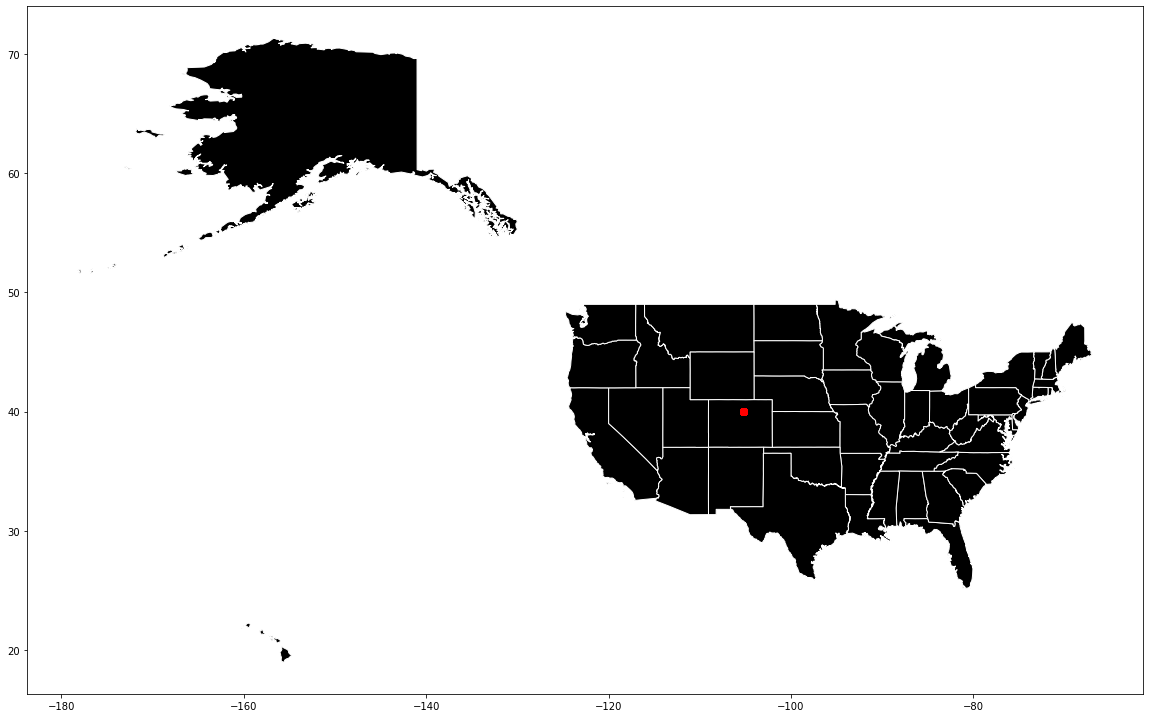

In [28]:
fig, ax = plt.subplots(figsize=(20,20))

ax.set_aspect("equal")

us_states.plot(ax=ax, color='black', edgecolor="white")
data.plot(ax=ax, color="red")

### Plotting each station using plotly

In [29]:
data_stations = data[["Station_Name", "geometry"]].drop_duplicates()
data_stations

,Station_Name,geometry
0,BOULDER / JUNCTION ST1,POINT (-105.25181 40.02421)
3,BOULDER / ALPINE ST1,POINT (-105.28078 40.02600)
4,BOULDER / BASELINE ST1,POINT (-105.28097 39.99740)
6,BOULDER / FACILITIES ST1,POINT (-105.27971 40.03608)
16,COMM VITALITY / 1500PEARL2,POINT (-105.27481 40.01855)
19,BOULDER / ATRIUM ST1,POINT (-105.27722 40.01543)
52,COMM VITALITY / 1000WALNUT1,POINT (-105.28261 40.01585)
56,COMM VITALITY / 1104 SPRUCE1,POINT (-105.28147 40.01854)
57,BOULDER / REC CENTER ST1,POINT (-105.24860 39.97468)
64,COMM VITALITY / 1500PEARL1,POINT (-105.27481 40.01855)


In [30]:
fig = px.scatter_geo(data_stations, lon=data_stations.geometry.x, lat=data_stations.geometry.y, hover_name="Station_Name")
fig.update_layout(geo_scope="usa")

#### Colorado Counties

In [31]:
colorado = gpd.read_file("colorado-counties/Colorado_Counties.shp")
colorado

,FID,FID_,AREA,PERIMETER,CNT50K_,CNT50K_ID,CNTY,NAME,SQ_MI,ACRES,REGION,A90,diss,geometry
0,1,0,1.231742e+10,467091.878788,2,1,81,MOFFAT,4755.750,3042580.0,11,11357,0,"POLYGON ((-107.31783 41.00307, -107.31750 40.9..."
1,2,0,1.421483e+09,157345.957879,3,2,115,SEDGWICK,548.833,350979.0,1,2690,0,"POLYGON ((-102.05187 40.74981, -102.07968 40.7..."
2,3,0,6.117831e+09,398636.833496,4,3,107,ROUTT,2362.090,1511680.0,12,14088,0,"POLYGON ((-107.31783 41.00307, -107.30892 41.0..."
3,4,0,4.779231e+09,282204.830575,5,4,75,LOGAN,1845.260,1180970.0,1,17567,0,"POLYGON ((-103.57404 41.00168, -103.55435 41.0..."
4,5,0,4.195073e+09,346818.982457,6,5,57,JACKSON,1619.720,1036870.0,12,1605,0,"POLYGON ((-106.19096 40.99763, -106.19139 40.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0,6.626315e+09,328696.474287,60,50,9,BACA,2558.420,1638110.0,6,4556,0,"POLYGON ((-102.04160 37.64416, -102.04184 37.5..."
59,60,0,4.404015e+09,291199.692275,61,51,67,LA PLATA,1700.390,1088390.0,9,32284,0,"POLYGON ((-107.48225 37.63963, -107.48218 37.6..."
60,61,0,3.184102e+09,255399.662198,62,52,23,COSTILLA,1229.380,787009.0,8,3190,0,"POLYGON ((-105.74335 37.35688, -105.71564 37.3..."
61,62,0,3.508185e+09,263692.991442,63,53,7,ARCHULETA,1354.510,867207.0,9,5345,0,"POLYGON ((-107.12859 37.42294, -107.12870 37.4..."


#### Plotting Points on Colorado Map

<AxesSubplot:>

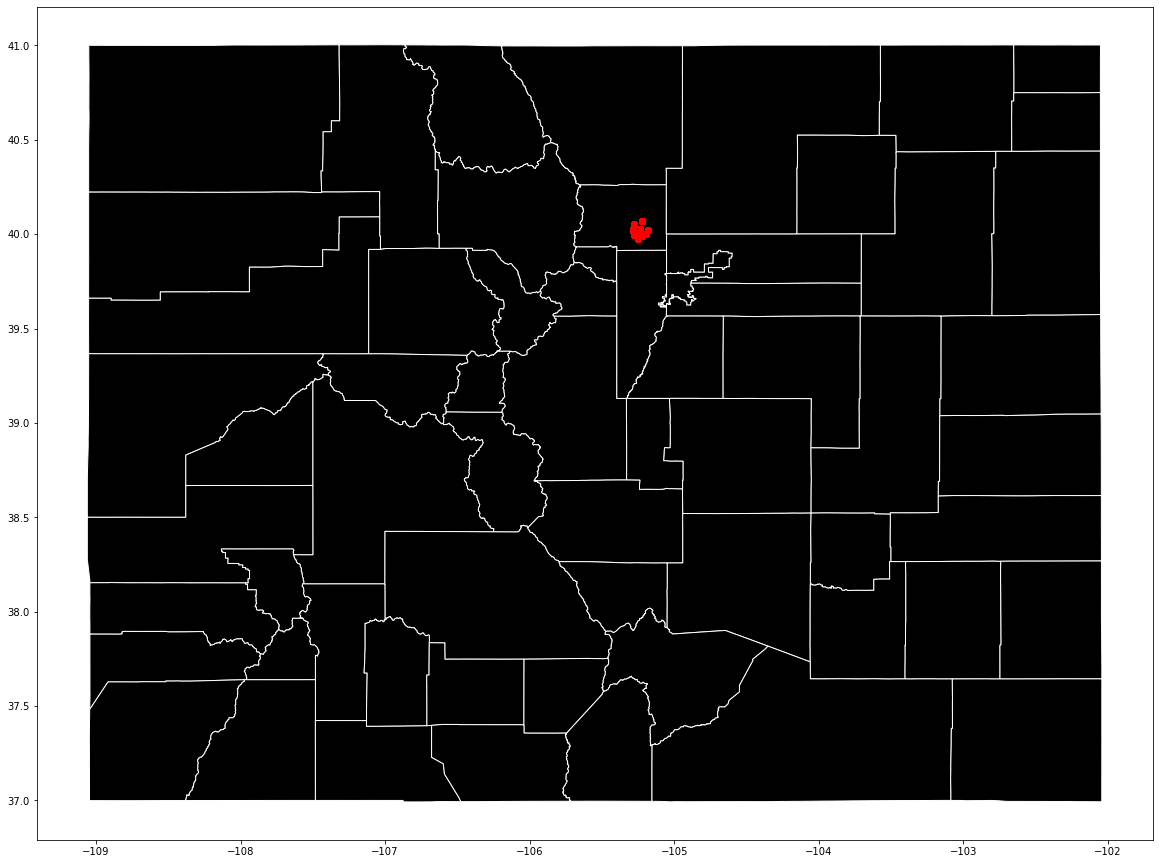

In [32]:
fig, ax = plt.subplots(figsize=(20,20))

ax.set_aspect("equal")

colorado.plot(ax=ax, color='black', edgecolor="white")
data.plot(ax=ax, color="red")

#### Plotly

In [33]:
fig1 = px.scatter_geo(data_stations, lon=data_stations.geometry.x, lat=data_stations.geometry.y, hover_name="Station_Name", color="Station_Name")
fig2 = px.choropleth(colorado, geojson=colorado.geometry, locations=colorado.index)

fig1.add_trace(fig2.data[0])
fig1.update_layout(geo_scope="usa")

In [34]:
data

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId,Full_Address,geometry,address
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-01 17:49:00,MDT,2018-01-01 19:52:00,MDT,0 days 02:03:02,0 days 02:02:44,6.504,2.732,0.816,Level 2,1,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-02 08:52:00,MDT,2018-01-02 09:16:00,MDT,0 days 00:24:34,0 days 00:24:19,2.481,1.042,0.311,Level 2,2,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-02 21:11:00,MDT,2018-01-03 06:23:00,MDT,0 days 09:12:21,0 days 03:40:52,15.046,6.319,1.888,Level 2,3,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti..."
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,2018-01-03 09:19:00,MDT,2018-01-03 11:14:00,MDT,0 days 01:54:51,0 days 01:54:29,6.947,2.918,0.872,Level 2,4,"1275 Alpine Ave, Boulder, Colorado",POINT (-105.28078 40.02600),"Ideal Market, 1275, Alpine Avenue, 80304, Alpi..."
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018-01-03 14:13:00,MDT,2018-01-03 14:30:00,MDT,0 days 00:16:58,0 days 00:16:44,1.800,0.756,0.226,Level 2,5,"900 Baseline Rd, Boulder, Colorado",POINT (-105.28097 39.99740),"Chautauqua Park, 900, Baseline Road, Baseline ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32630,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,2021-11-28 10:57:00,MST,2021-11-28 12:01:00,MST,0 days 01:03:59,0 days 01:02:53,6.337,4.500,0.795,Level 2,32631,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou..."
32631,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,2021-11-28 11:30:00,MST,2021-11-28 13:42:00,MST,0 days 02:12:04,0 days 02:11:40,7.275,5.165,0.913,Level 2,32632,"1100 Spruce St, Boulder, Colorado",POINT (-105.28147 40.01854),"1100, Spruce Street, 80302, Spruce Street, Bou..."
32632,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,2021-11-28 12:02:00,MST,2021-11-28 14:45:00,MST,0 days 02:43:13,0 days 01:52:31,5.609,3.983,0.704,Level 2,32633,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou..."
32633,BOULDER / AIRPORT ST1,3335 Airport Rd,Boulder,Colorado,80301,2021-11-28 13:04:00,MST,2021-11-28 15:42:00,MST,0 days 02:38:10,0 days 02:37:48,12.963,9.204,1.627,Level 2,32634,"3335 Airport Rd, Boulder, Colorado",POINT (-105.23403 40.02914),"Valmont Rd & Airport Rd, Valmont Road, 80303-1..."


#### Statistics

Text(0, 0.5, 'Mean Energy Consumated [kWh]')

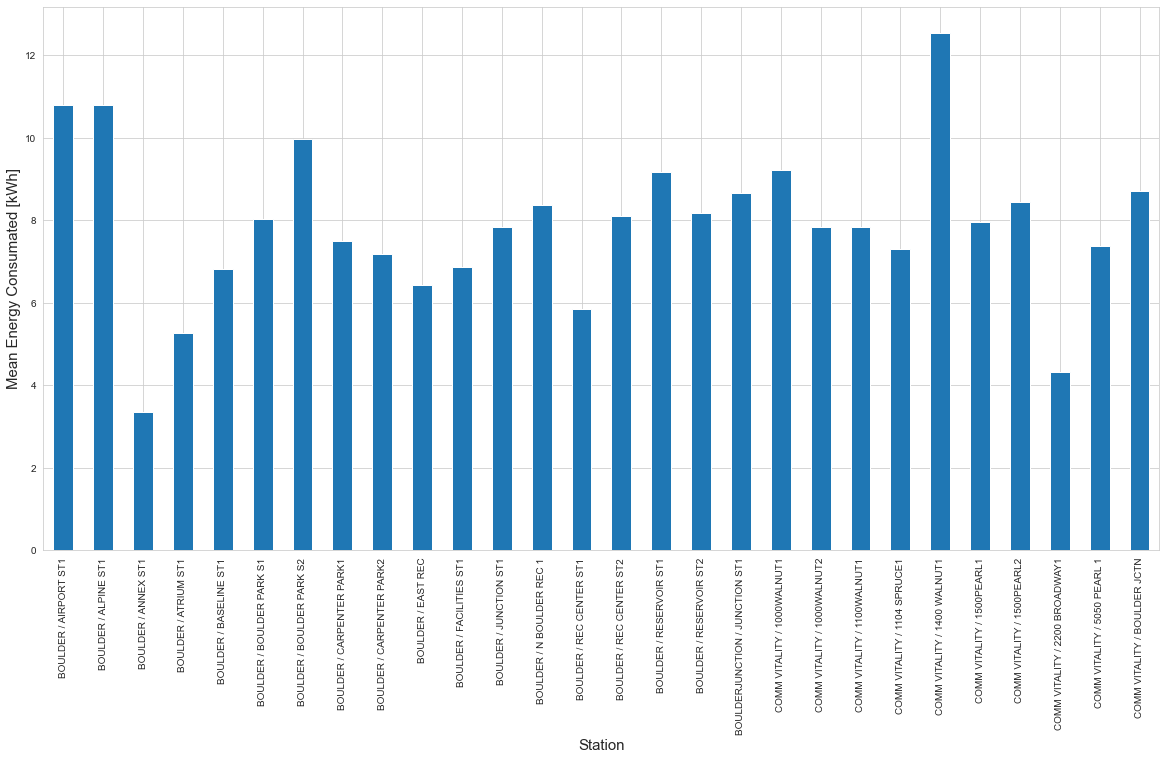

In [70]:
sns.set_style('whitegrid')
mean_energy=data.groupby("Station_Name")['Energy__kWh_'].mean().plot(kind="bar", figsize=(20,10))

plt.xlabel("Station", fontsize=15)
plt.ylabel("Mean Energy Consumated [kWh]", fontsize=15)

Text(0, 0.5, 'GHG Savings [kg]')

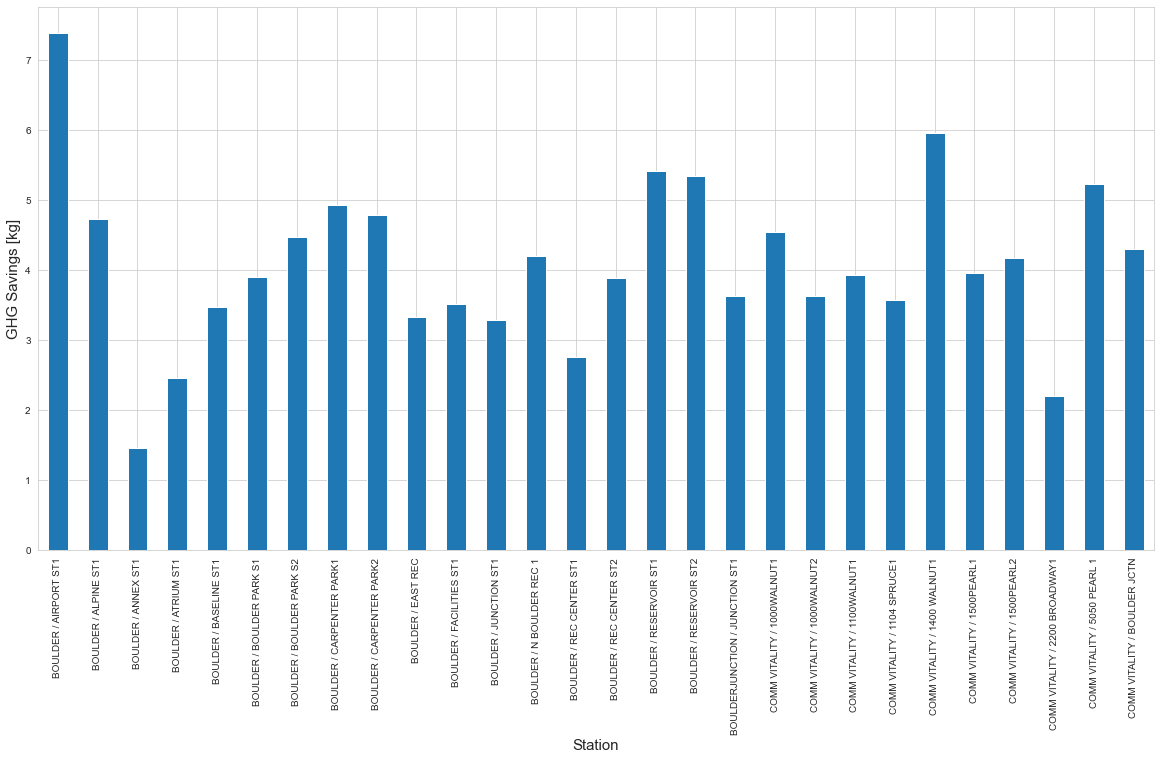

In [72]:
sns.set_style('whitegrid')
mean_ghg=data.groupby("Station_Name")['GHG_Savings__kg_'].mean().plot(kind="bar", figsize=(20,10))

plt.xlabel("Station", fontsize=15)
plt.ylabel("GHG Savings [kg]", fontsize=15)

Text(0, 0.5, 'Gasoline Savings [gallons]')

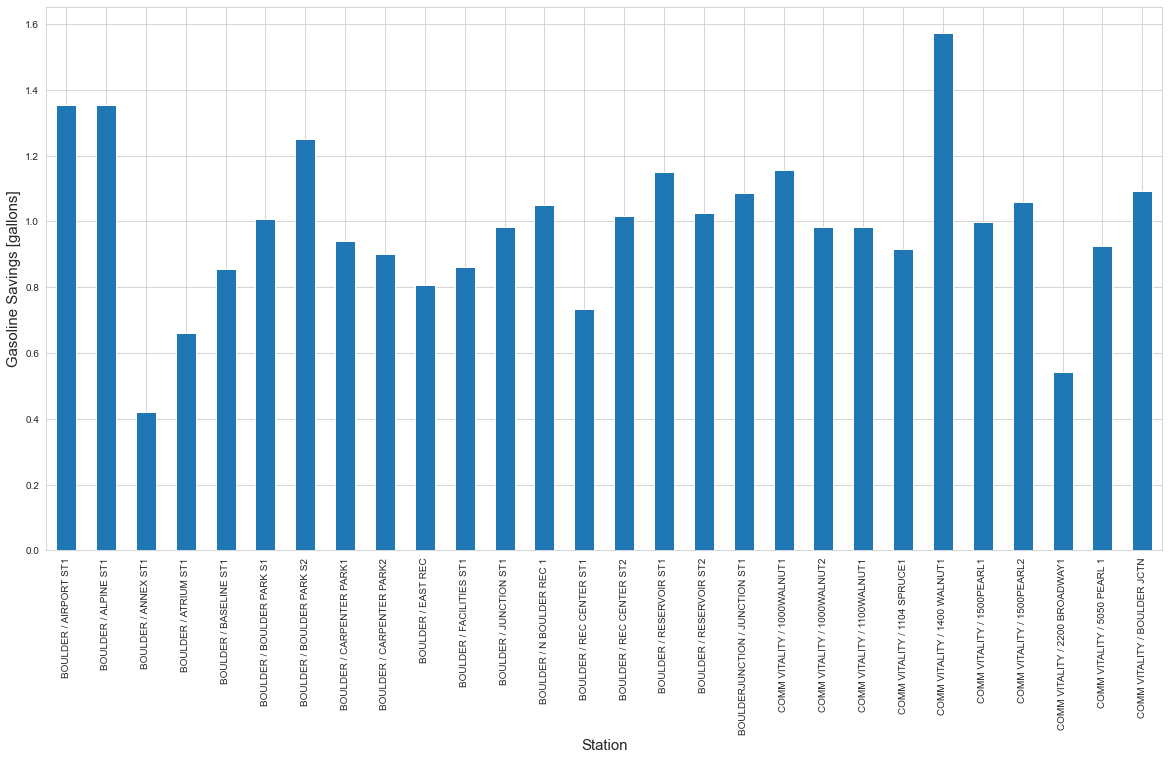

In [73]:
sns.set_style('whitegrid')
mean_gas=data.groupby("Station_Name")['Gasoline_Savings__gallons_'].mean().plot(kind="bar", figsize=(20,10))

plt.xlabel("Station", fontsize=15)
plt.ylabel("Gasoline Savings [gallons]", fontsize=15)

#### Efficiency of particular car
Calculated by how much energy the car took

In [88]:
data["Charging_Time__hours"]=data["Charging_Time__hh_mm_ss_"] / np.timedelta64(1, 'h')

In [89]:
data["Energy_Taken_kW"]=data["Charging_Time__hours"] * data["Energy__kWh_"]
data

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,...,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId,Full_Address,geometry,address,Energy_Taken_kW,Charging_Time__hours
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-01 17:49:00,MDT,2018-01-01 19:52:00,MDT,0 days 02:03:02,...,6.504,2.732,0.816,Level 2,1,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti...",13.304293,2.045556
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-02 08:52:00,MDT,2018-01-02 09:16:00,MDT,0 days 00:24:34,...,2.481,1.042,0.311,Level 2,2,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti...",1.005494,0.405278
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,2018-01-02 21:11:00,MDT,2018-01-03 06:23:00,MDT,0 days 09:12:21,...,15.046,6.319,1.888,Level 2,3,"2280 Junction Pl, Boulder, Colorado",POINT (-105.25181 40.02421),"Hyatt Place Boulder-Pearl Street, 2280, Juncti...",55.385998,3.681111
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,2018-01-03 09:19:00,MDT,2018-01-03 11:14:00,MDT,0 days 01:54:51,...,6.947,2.918,0.872,Level 2,4,"1275 Alpine Ave, Boulder, Colorado",POINT (-105.28078 40.02600),"Ideal Market, 1275, Alpine Avenue, 80304, Alpi...",13.255262,1.908056
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018-01-03 14:13:00,MDT,2018-01-03 14:30:00,MDT,0 days 00:16:58,...,1.800,0.756,0.226,Level 2,5,"900 Baseline Rd, Boulder, Colorado",POINT (-105.28097 39.99740),"Chautauqua Park, 900, Baseline Road, Baseline ...",0.502000,0.278889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32630,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,2021-11-28 10:57:00,MST,2021-11-28 12:01:00,MST,0 days 01:03:59,...,6.337,4.500,0.795,Level 2,32631,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou...",6.641528,1.048056
32631,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,2021-11-28 11:30:00,MST,2021-11-28 13:42:00,MST,0 days 02:12:04,...,7.275,5.165,0.913,Level 2,32632,"1100 Spruce St, Boulder, Colorado",POINT (-105.28147 40.01854),"1100, Spruce Street, 80302, Spruce Street, Bou...",15.964583,2.194444
32632,COMM VITALITY / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,2021-11-28 12:02:00,MST,2021-11-28 14:45:00,MST,0 days 02:43:13,...,5.609,3.983,0.704,Level 2,32633,"1100 Walnut, Boulder, Colorado",POINT (-105.28028 40.01661),"1100, Walnut Street, 80302, Walnut Street, Bou...",10.518433,1.875278
32633,BOULDER / AIRPORT ST1,3335 Airport Rd,Boulder,Colorado,80301,2021-11-28 13:04:00,MST,2021-11-28 15:42:00,MST,0 days 02:38:10,...,12.963,9.204,1.627,Level 2,32634,"3335 Airport Rd, Boulder, Colorado",POINT (-105.23403 40.02914),"Valmont Rd & Airport Rd, Valmont Road, 80303-1...",34.092690,2.630000


#### Scatterplot of energy taken depending on charging time

(0.0, 2284.4853500000004)

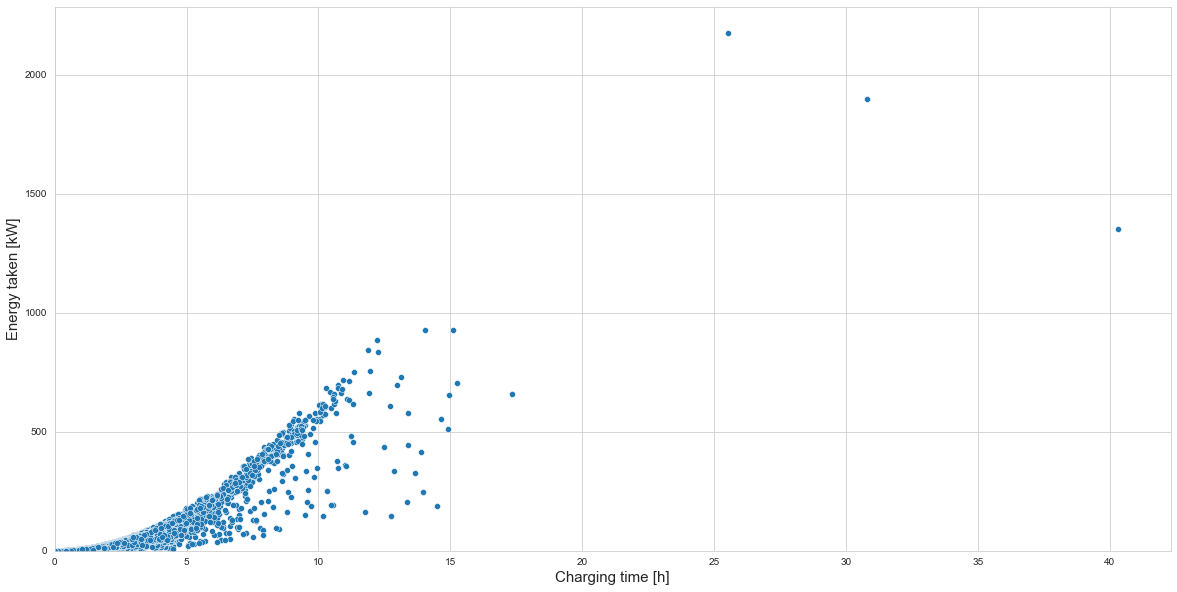

In [93]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.scatterplot(x="Charging_Time__hours", y="Energy_Taken_kW", data=data)

plt.xlabel("Charging time [h]", fontsize=15)
plt.ylabel("Energy taken [kW]", fontsize=15)

plt.xlim(left=0)
plt.ylim(bottom=0)

We can observe that there is polynomial correlation between those features

#### 